# A Brief On Complex Analysis

Studying scattering processes in physics inevitably leads us to require understanding fundamental concepts in <em>complex analysis</em>, such as pole singularities, branch cuts, and contour integrals. In this notebook, we review some basic features which we need in order to begin our study of scattering amplitudes. 

#### References
I find the following references useful, you may too:
* *Fundamentals of Complex Analysis with Applications to Engineering, Science, and Mathematics* - Saff and Snider

In the context of scattering, this old (but very useful) book has a good chapter on complex analysis
* *Dispersion Relation Dynamics* - Burkhardt

This blog post has a nice discussion on moving the branch cut of the square root, some of which I have taken for these exercises
* <https://flothesof.github.io/branch-cuts-with-square-roots.html>

And I have taken excerpts from the following website which has some numerical exercises for Cauchy's theorem
* <http://people.exeter.ac.uk/sh481/cauchy-theorem.html>

In [ ]:
'''
Importing useful libraries
'''
import cmath as cm                          # math library (complex)
import math as m                            # math library
import numpy as np                          # basic functions, linear algebra, etc.
import scipy.special as sp                  # special functions
import numpy.random as rn                   # random numbers
import matplotlib.pyplot as plt             # plotting library
from scipy import integrate                 # library for integration
from mpl_toolkits import mplot3d            # for 3d plotting 
from matplotlib.colors import hsv_to_rgb    # convert the color from HSV coordinates to RGB coordinates
from colorsys import hls_to_rgb             # convert the color from HLS coordinates to RGB coordinates


'''
A utility function very useful for plotting functions in the complex plane.

Taken from the forum http://stackoverflow.com/questions/17044052/mathplotlib-imshow-complex-2d-array
'''
def colorize(z):
    r = np.abs(z)
    arg = np.angle(z) 

    h = (arg + np.pi)  / (2 * np.pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**0.5)
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)                      # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2)
    c = c.swapaxes(0,1)
    return c

'''
Plots a function 'f(z)' in the complex z-plane (2D version)
'''
def argand_plot_2D(func,args):
    "Plots a function in the Argand (complex) plane."
    X, Y = np.meshgrid( np.linspace(-2, 2, 500),  # points on the x-axis (xmin,xmax,xnum)
                        np.linspace(-2, 2, 500) ) # points on the y-axis (ymin,ymax,ynum)
    Z = X + 1j * Y 
    Zc = colorize(Z)
    ax1 = plt.gcf().add_subplot(211, projection='3d')
    ax2 = plt.gcf().add_subplot(212, projection='3d')
    ax1.imshow(Zc, np.real(func(Z,*args)), rstride=1, cstride=1, cmap='viridis')
    ax1.set_xlabel(r'Re $z$')
    ax1.set_ylabel(r'Im $z$')
    ax1.set_title('real part')
    ax2.imshow(X, Y, np.imag(func(Z,*args)), rstride=1, cstride=1, cmap='magma')
    ax2.set_xlabel(r'Re $z$')
    ax2.set_ylabel(r'Im $z$')
    ax2.set_title('imaginary part')

# Plot range -xmax:xmax and -ymax:ymax 
xmax=3
ymax=3
xp=np.linspace(-3,3,500) # the points on the x axis
yp=np.linspace(-3,3,500) # the points on the y axis
X,Y = np.meshgrid(xp, yp) # make a mesh out of the points on the x and y axes
cwrap=lambda x,y: f(x+1j*y) # turn x and y coordinates into a complex number z=x + i y and return integrand(z)
Z = cwrap(X, Y) # evaluate f(z) on the mesh and record the values in an array
Zc=colorize(Z)

# Use latex to render axis labels
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)

#plt.title("Plot of the integrand in Cauchy's theorem",y=1.05)
plt.imshow(Zc,origin='lower',extent=(-xmax,xmax,-ymax,ymax))
plt.xlabel(r'$x$',fontsize=18)
plt.ylabel(r'$y$',fontsize=18)
#plt.plot(np.real(z0),np.imag(z0),'bo') # put a blue circle at the point z0
#plt.text(np.real(z0)+0.2,np.imag(z0),"$z_0$",fontsize=18,color='b') # Label the point z0
plt.plot(np.real(C),np.imag(C),'r-',lw=2)
plt.text(np.real(C[0])+0.2,np.imag(C[0]),r'$C$',fontsize=18,color='r')

'''
Plots a function 'f(z)' in the complex z-plane (3D version)

Taken from https://flothesof.github.io/branch-cuts-with-square-roots.html
'''
def argand_plot_3D(func,args):
    "Plots a function in the Argand (complex) plane."
    X, Y = np.meshgrid(np.linspace(-2, 2),
                       np.linspace(-2, 2))
    Z = X + 1j * Y
    ax1 = plt.gcf().add_subplot(211, projection='3d')
    ax2 = plt.gcf().add_subplot(212, projection='3d')
    ax1.plot_surface(X, Y, np.real(func(Z,*args)), rstride=1, cstride=1, cmap='viridis')
    ax1.set_xlabel(r'Re $z$')
    ax1.set_ylabel(r'Im $z$')
    ax1.set_title('real part')
    ax2.plot_surface(X, Y, np.imag(func(Z,*args)), rstride=1, cstride=1, cmap='magma')
    ax2.set_xlabel(r'Re $z$')
    ax2.set_ylabel(r'Im $z$')
    ax2.set_title('imaginary part')

## Pole singularities

Pole singularities are the simplest non-analyticity we need to understand. 

If a function $f$ exhibits a pole singularitiy, in a region around the pole the function has the general form
$$
f(z) = \frac{r_0}{z - z_0} \, ,
$$
where $z_0$ is the position of the pole in the complex $z$-plane, and $r_0$ is the residue at the pole.

/Users/andrewjackura/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


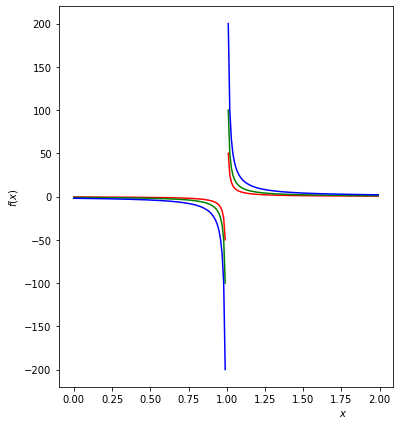

In [9]:
def f(z,z0,r0):
    return r0 / ( z - z0 )

z0 = 1.0
r0 = 1.0

x = np.arange(0, 2, 0.01)
fval = f( x, z0, r0 )
#plt.plot(x, fval.real)
#plt.plot(x, fval.imag)

f1 = f( x, z0, 0.5 )
f2 = f( x, z0, 1.0 )
f3 = f( x, z0, 2.0 )


plt.plot(x, f1, 'r')
plt.plot(x, f2, 'g')
plt.plot(x, f3, 'b')
plt.xlabel(r'$x$', position=(.85,1))
plt.ylabel(r'$f(x)$')
plt.show()


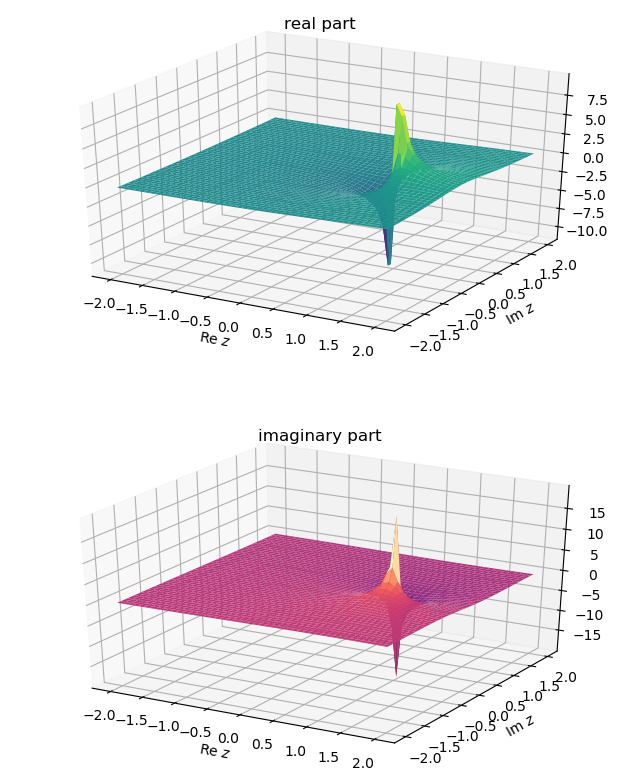

In [5]:
def argand_plot(func,args):
    "Plots a function in the Argand (complex) plane."
    X, Y = np.meshgrid(np.linspace(-2, 2),
                      np.linspace(-2, 2))
    Z = X + 1j * Y
    ax1 = plt.gcf().add_subplot(211, projection='3d')
    ax2 = plt.gcf().add_subplot(212, projection='3d')
    ax1.plot_surface(X, Y, np.real(func(Z,*args)), rstride=1, cstride=1, cmap='viridis')
    ax1.set_xlabel(r'Re $z$')
    ax1.set_ylabel(r'Im $z$')
    ax1.set_title('real part')
    ax2.plot_surface(X, Y, np.imag(func(Z,*args)), rstride=1, cstride=1, cmap='magma')
    ax2.set_xlabel(r'Re $z$')
    ax2.set_ylabel(r'Im $z$')
    ax2.set_title('imaginary part')

z0 = 1.0
r0 = 1.0

plt.rcParams['figure.figsize'] = (6, 7)
plt.figure(figsize=(8,10), dpi= 100, facecolor='w', edgecolor='k')
argand_plot(f,args=[z0,r0])

## Cauchy's theorem

Here we numerically investigate Cauchy's theorem and its consequences. Cauchy's theorem states that if a function $f(z)$ with $z\in\mathbb{C}$ is analytic everywhere within and on a closed contour $C$, then
$$
\oint_{C} \!\mathrm{d}z \, f(z) = 0
$$

In [25]:
# The function (analytic within the contour C) we're going to put into Cauchy's integral formula
# In this example I'll use three random numbers between -5 and 5 to construct the function f(z)
a=10.0*(rn.random()-0.5)
b=10.0*(rn.random()-0.5)
c=10.0*(rn.random()-0.5)

# The integrand in Cauchy's theorem
def f(z):
    return a + b*z + c*z**2

'''
Integrates any complex function 'func' along a path 'path' in the complex plane that is formed from a list of points
'''
def contour_integrate(func,path):
    result=0.0
    for n in np.arange(len(path)-1):
        z0 = path[n]
        dz = path[n+1]-path[n]
        integrand_real = lambda x: np.real( func(z0+x*dz)*dz )
        integrand_imag = lambda x: np.imag( func(z0+x*dz)*dz )
        result_real = integrate.quad(integrand_real,0.0,1.0)[0] # keep value only
        result_imag = integrate.quad(integrand_imag,0.0,1.0)[0] # keep value only
        result += result_real + 1j*result_imag
    return result

'''
Here we choose a quadrilateral contour, with the corners specified by C1,C2,C3, and C4
'''
# Points on closed contour
C1=1.0
C2=2.0*1j+1.2
C3=-0.5+1j
C4=-1j
C5=C1 # close path

C=[C1,C2,C3,C4,C5]

integral=contour_integrate(lambda z:f(z),C)/(2.0*np.pi*1j)
print("Result of integrating along C: {0}".format(integral))

Result of integrating along C: 0j


Text(1.2, 0.0, '$C$')

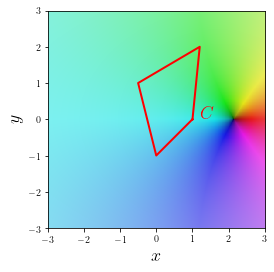

In [24]:


# Plot range -xmax:xmax and -ymax:ymax 
xmax=3
ymax=3
xp=np.linspace(-3,3,500) # the points on the x axis
yp=np.linspace(-3,3,500) # the points on the y axis
X,Y = np.meshgrid(xp, yp) # make a mesh out of the points on the x and y axes
cwrap=lambda x,y: f(x+1j*y) # turn x and y coordinates into a complex number z=x + i y and return integrand(z)
Z = cwrap(X, Y) # evaluate f(z) on the mesh and record the values in an array
Zc=colorize(Z)

# Use latex to render axis labels
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)

#plt.title("Plot of the integrand in Cauchy's theorem",y=1.05)
plt.imshow(Zc,origin='lower',extent=(-xmax,xmax,-ymax,ymax))
plt.xlabel(r'$x$',fontsize=18)
plt.ylabel(r'$y$',fontsize=18)
#plt.plot(np.real(z0),np.imag(z0),'bo') # put a blue circle at the point z0
#plt.text(np.real(z0)+0.2,np.imag(z0),"$z_0$",fontsize=18,color='b') # Label the point z0
plt.plot(np.real(C),np.imag(C),'r-',lw=2)
plt.text(np.real(C[0])+0.2,np.imag(C[0]),r'$C$',fontsize=18,color='r')

Result of integrating along C: (-4.4370520055267235-6.565981451618209j)

f(z0): (-4.437052005526723-6.56598145161821j)


Text(1.2, 0.0, '$C$')

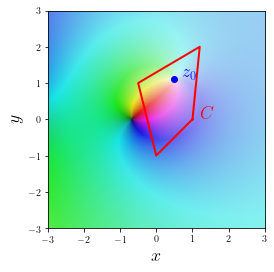

In [30]:
def g(z,z0):
    return f(z)/(z-z0)

z0=0.5 + 1.1*1j

integral=contour_integrate(lambda z:g(z,z0),C)/(2.0*np.pi*1j)
fz0=f(z0)
print("Result of integrating along C: {0}\n\nf(z0): {1}".format(integral,fz0))


# Plot range -xmax:xmax and -ymax:ymax 
xmax=3
ymax=3
xp=np.linspace(-3,3,500) # the points on the x axis
yp=np.linspace(-3,3,500) # the points on the y axis
X,Y = np.meshgrid(xp, yp) # make a mesh out of the points on the x and y axes
cwrap=lambda x,y: g(x+1j*y,z0) # turn x and y coordinates into a complex number z=x + i y and return integrand(z)
Z = cwrap(X, Y) # evaluate f(z) on the mesh and record the values in an array
Zc=colorize(Z)

plt.imshow(Zc,origin='lower',extent=(-xmax,xmax,-ymax,ymax))
plt.xlabel("$x$",fontsize=18)
plt.ylabel("$y$",fontsize=18)
plt.plot(np.real(z0),np.imag(z0),'bo') # put a blue circle at the point z0
plt.text(np.real(z0)+0.2,np.imag(z0),"$z_0$",fontsize=18,color='b') # Label the point z0
plt.plot(np.real(C),np.imag(C),'r-',lw=2)
plt.text(np.real(C[0])+0.2,np.imag(C[0]),"$C$",fontsize=18,color='r')

## The Square Root Function

Defining $z = r e^{i\varphi}$, the square-root gives $\sqrt{z} = \sqrt{r} e^{i\varphi /2}$, where the domain of $\varphi$ is $\varphi \in [-\pi,\pi)$, meaning there is a branch cut directed along the negative real axis starting at $z=0$.

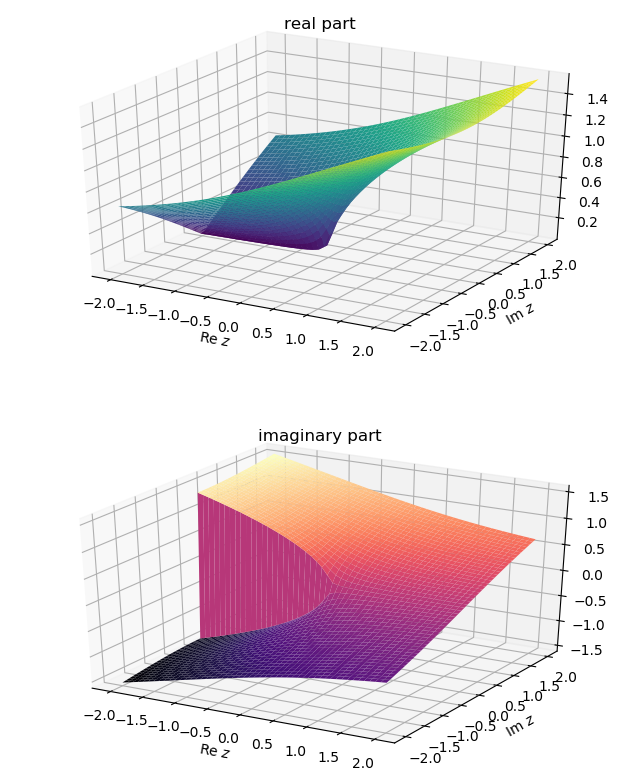

In [2]:


def argand_plot(func):
    "Plots a function in the Argand (complex) plane."
    X, Y = np.meshgrid(np.linspace(-2, 2),
                      np.linspace(-2, 2))
    Z = X + 1j * Y
    ax1 = plt.gcf().add_subplot(211, projection='3d')
    ax2 = plt.gcf().add_subplot(212, projection='3d')
    ax1.plot_surface(X, Y, np.real(func(Z)), rstride=1, cstride=1, cmap='viridis')
    ax1.set_xlabel(r'Re $z$')
    ax1.set_ylabel(r'Im $z$')
    ax1.set_title('real part')
    ax2.plot_surface(X, Y, np.imag(func(Z)), rstride=1, cstride=1, cmap='magma')
    ax2.set_xlabel(r'Re $z$')
    ax2.set_ylabel(r'Im $z$')
    ax2.set_title('imaginary part')

plt.rcParams['figure.figsize'] = (6, 7)
plt.figure(figsize=(8,10), dpi= 100, facecolor='w', edgecolor='k')
argand_plot(np.sqrt)

## Bonus: Logarithmic Functions

Logarithmic function exhibit branch cuts like the square-root function. For our purposes here, we do not need the details of the Logarithm, however it is extremely important for more advanced aspects of scattering, e.g. partial wave projections of crossed-channel amplitudes.